<a href="https://colab.research.google.com/github/Atharva-Gaykar/ML-Work/blob/main/Loan_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
raw_dt=pd.read_csv("/content/drive/MyDrive/loan_data.csv")
raw_dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
raw_dt['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [ ]:
raw_dt2=raw_dt.drop('loan_status',axis=1)
target=raw_dt['loan_status']
raw_dt2


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [ ]:
educationcount=raw_dt['person_education']
ans=educationcount.value_counts()
ans

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [ ]:
income_basededucation=raw_dt.groupby(raw_dt['person_education'])[['person_income','loan_status']].agg(['mean','sum'])
value = len(raw_dt[(raw_dt['person_education'] == 'Doctorate') & (raw_dt['loan_status'] == 1)])
income_basededucation['loan_status']['sum'].sort_values(ascending=False)

person_education
Bachelor       3018
High School    2671
Associate      2650
Master         1519
Doctorate       142
Name: sum, dtype: int64

In [ ]:
income_basededucation

person_income               loan_status      
                          mean           sum        mean   sum
person_education                                              
Associate         80641.623628  9.699574e+08    0.220319  2650
Bachelor          79703.319725  1.067945e+09    0.225241  3018
Doctorate         87234.541063  5.417265e+07    0.228663   142
High School       80224.597645  9.604489e+08    0.223104  2671
Master            80491.924355  5.618336e+08    0.217622  1519

In [ ]:
income_basededucation['person_income']['mean'].sort_values(ascending=False)

person_education
Doctorate      87234.541063
Associate      80641.623628
Master         80491.924355
High School    80224.597645
Bachelor       79703.319725
Name: mean, dtype: float64

In [ ]:

numeric_columnlist =raw_dt2.select_dtypes(include=np.number).columns.to_list()
numeric_column_dt=raw_dt2[numeric_columnlist]
category_column_dt=raw_dt2[raw_dt2.select_dtypes('object').columns.to_list()]
category_column_copy=category_column_dt.copy()
category_column_dtlist=raw_dt2.select_dtypes('object').columns.to_list()

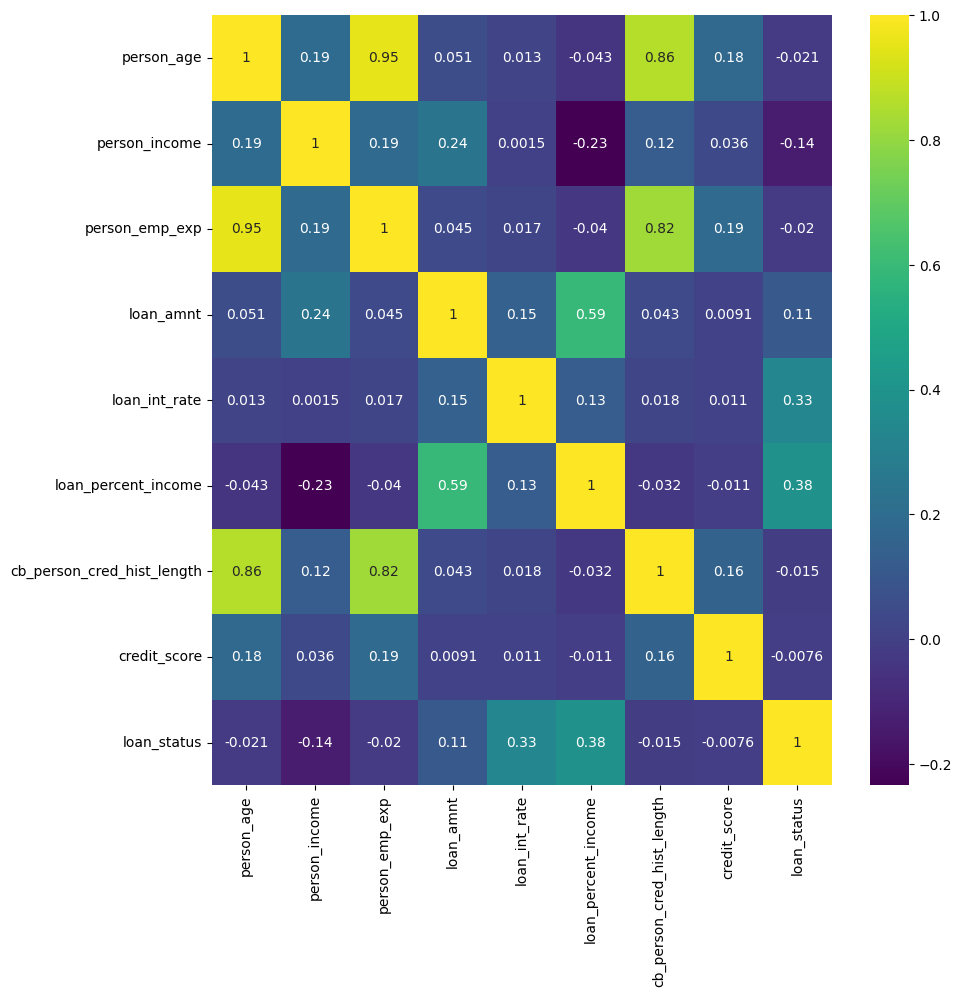

In [ ]:
numeric_columnlisttar =raw_dt.select_dtypes(include=np.number).columns.to_list()
numeric_column_dttar=raw_dt[numeric_columnlisttar]
numeric_column_dttar
corr = numeric_column_dttar.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()


In [ ]:

numeric_column_dt
train_inputnumerical =numeric_column_dt[[ 'person_income','loan_amnt','loan_int_rate','loan_percent_income']]

# to seprate the data for giving it as input in model
train_inputnumerical
single_input_numerical =train_inputnumerical.columns.to_list()

In [ ]:
category_column_dt

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [ ]:
from sklearn.preprocessing import LabelEncoder

category_column_dt_copy = category_column_dt
# Label Encoding the categorical columns
for col in category_column_dt.columns:
    le = LabelEncoder()
    category_column_dt.loc[:, col] = le.fit_transform(category_column_dt[col])

print(category_column_dt)
# : indicates that we are interestedin each row of the column

      person_gender person_education person_home_ownership loan_intent  \
0                 0                4                     3           4   
1                 0                3                     2           1   
2                 0                3                     0           3   
3                 0                1                     3           3   
4                 1                4                     3           3   
...             ...              ...                   ...         ...   
44995             1                0                     3           3   
44996             0                0                     3           2   
44997             1                0                     3           0   
44998             1                1                     3           1   
44999             1                3                     3           0   

      previous_loan_defaults_on_file  
0                                  0  
1                                

In [ ]:
from sklearn.feature_selection import chi2
Y=target
X=category_column_dt
chi2_score = chi2(X,Y)
print(chi2_score)

(array([6.35182619e-03, 1.72229716e-01, 3.00943860e+03, 2.77074941e+02,
       6.53085714e+03]), array([9.36477176e-01, 6.78137744e-01, 0.00000000e+00, 3.25858349e-62,
       0.00000000e+00]))


<Axes: >

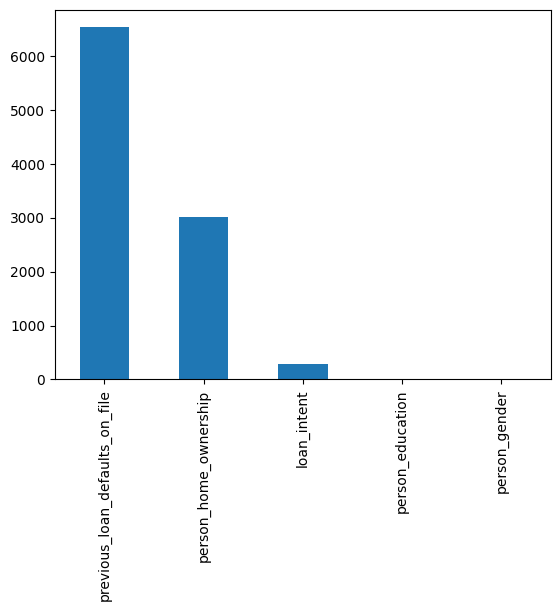

In [ ]:
chi_values=pd.Series(chi2_score[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

In [ ]:
chi_values

previous_loan_defaults_on_file    6530.857143
person_home_ownership             3009.438601
loan_intent                        277.074941
person_education                     0.172230
person_gender                        0.006352
dtype: float64

In [ ]:
train_inputcategorical=X.drop(['person_education','person_gender'],axis=1)
train_inputcategorical
single_input_categorical=train_inputcategorical.columns.to_list()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
data_imp_cate=category_column_copy.drop(['person_education','person_gender'],axis=1)

# Assuming 'category_column_copy' contains our categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoder.fit(data_imp_cate)

# Get the feature names after encoding
encoded_cols = encoder.get_feature_names_out(data_imp_cate.columns)

encoded_data = encoder.transform(data_imp_cate)

# Convert the encoded data to a DataFrame
encoded_cate = pd.DataFrame(encoded_data, columns=encoded_cols)








In [ ]:
encoded_cate




,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
44996,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
44997,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44998,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
train_inputnumerical
train_in_cate=encoded_cate


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_inputnumerical)

MinMaxScaler()

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(8000.0), np.float64(500.0), np.float64(5.42), np.float64(0.0)]

In [ ]:


scaled_numerical=scaler.transform(train_inputnumerical)
scaled_numericaldf=pd.DataFrame(scaled_numerical,columns=train_inputnumerical.columns)
scaled_numericaldf

,person_income,loan_amnt,loan_int_rate,loan_percent_income
0,0.008891,1.000000,0.727023,0.742424
1,0.000595,0.014493,0.392318,0.121212
2,0.000617,0.144928,0.510974,0.666667
3,0.009976,1.000000,0.672840,0.666667
4,0.008082,1.000000,0.606996,0.803030
...,...,...,...,...
44995,0.005557,0.420290,0.702332,0.469697
44996,0.008036,0.246377,0.593278,0.212121
44997,0.006804,0.065826,0.315501,0.075758
44998,0.003499,0.333333,0.535665,0.545455


In [ ]:
scaled_numerical

array([[8.89059925e-03, 1.00000000e+00, 7.27023320e-01, 7.42424242e-01],
       [5.95320354e-04, 1.44927536e-02, 3.92318244e-01, 1.21212121e-01],
       [6.17008811e-04, 1.44927536e-01, 5.10973937e-01, 6.66666667e-01],
       ...,
       [6.80433647e-03, 6.58260870e-02, 3.15500686e-01, 7.57575758e-02],
       [3.49851504e-03, 3.33333333e-01, 5.35665295e-01, 5.45454545e-01],
       [6.06289708e-03, 1.78695652e-01, 7.97668038e-01, 1.96969697e-01]],
      shape=(45000, 4))

In [ ]:
final_traindt = pd.concat([scaled_numericaldf,encoded_cate,raw_dt['loan_status']], axis=1)
final_traindt

encoded_colofinput=encoded_cate.columns.to_list()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(final_traindt, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
train_df
model_target_train=train_df['loan_status'].copy()
model_target_val=val_df['loan_status'].copy()
model_target_test=test_df['loan_status'].copy()
train_df=train_df.drop(columns=['loan_status'])
val_df=val_df.drop(columns=['loan_status'])
test_df=test_df.drop(columns=['loan_status'])

In [ ]:

train_df

,person_income,loan_amnt,loan_int_rate,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
7311,0.005035,0.173913,0.383402,0.227273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19380,0.002857,0.072464,0.549383,0.166667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17838,0.012359,1.000000,0.699588,0.545455,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21116,0.006563,0.565217,0.356653,0.545455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9428,0.009384,0.275362,0.039095,0.196970,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,0.006768,0.043478,0.153635,0.060606,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
35496,0.009848,0.107246,0.670782,0.075758,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19320,0.011531,0.057971,0.450617,0.045455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10192,0.006575,0.263768,0.463649,0.257576,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
val_df

,person_income,loan_amnt,loan_int_rate,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
35673,0.003522,0.060174,0.512346,0.121212,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
37682,0.011434,0.072464,0.519204,0.045455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
22467,0.014030,0.188406,0.431413,0.090909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1485,0.003539,0.260145,0.241427,0.424242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15348,0.020723,0.640580,0.654321,0.212121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19342,0.018296,0.068116,0.076818,0.030303,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3586,0.005279,0.188406,0.076818,0.227273,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38611,0.004475,0.217391,0.227023,0.303030,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7783,0.005230,0.188406,0.379287,0.227273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
test_df

,person_income,loan_amnt,loan_int_rate,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
37979,0.012355,0.202899,0.042524,0.121212,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9911,0.006790,0.246377,0.416324,0.242424,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43386,0.004073,0.130435,0.648834,0.196970,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13822,0.004441,0.130435,0.587791,0.196970,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
44810,0.008338,0.275362,0.685185,0.227273,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,0.017407,0.391304,0.313443,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
30384,0.007492,0.180435,0.756516,0.166667,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
36665,0.009864,0.391304,0.427298,0.272727,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30569,0.004052,0.217391,0.383402,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
model_target_train

7311     0
19380    0
17838    1
21116    0
9428     0
        ..
16192    0
35496    0
19320    0
10192    0
32546    0
Name: loan_status, Length: 27000, dtype: int64

In [ ]:
list_ran=raw_dt2.columns.to_list()
list_ran

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']

In [ ]:
allcolumns=list(raw_dt2.columns)
allcolumns
print(len(allcolumns))

13


In [ ]:
print(single_input_categorical)
print(len(single_input_categorical))

['person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
3


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_df,model_target_train)

LogisticRegression()

In [ ]:
model.score(train_df, model_target_train)

0.8932222222222223

In [ ]:
model.fit(val_df,model_target_val)
model.score(val_df, model_target_val)

0.8922222222222222

In [ ]:
model.fit(test_df,model_target_test)
model.score(test_df, model_target_test)

0.8907777777777778

In [ ]:
def predict_and_plot_lr(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

Accuracy: 89.08%


array([0, 0, 1, ..., 0, 1, 1], shape=(9000,))

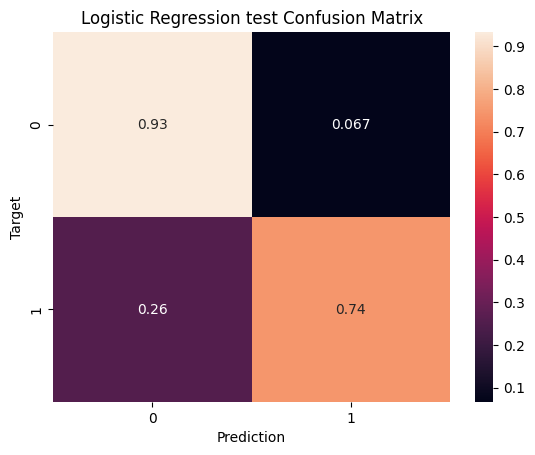

In [ ]:
predict_and_plot_lr(test_df, model_target_test, name='Logistic Regression test')

In [ ]:
raw_dt


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
modeldt = DecisionTreeClassifier(random_state=42)
modeldt.fit(train_df,model_target_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_preddt = modeldt.predict(train_df)
print(train_preddt)

[0 0 1 ... 0 0 0]


In [ ]:
print(pd.value_counts(train_preddt))



0    21017
1     5983
Name: count, dtype: int64


C:\Users\ATHARVA\AppData\Local\Temp\ipykernel_14844\3894751054.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(train_preddt))


In [ ]:
accuracy_score(model_target_train, train_preddt)

1.0

In [ ]:
modeldt.score(val_df, model_target_val)

0.9053333333333333

[Text(0.375, 0.875, 'previous_loan_defaults_on_file_No <= 0.5\ngini = 0.345\nsamples = 27000\nvalue = [21017, 5983]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 13666\nvalue = [13666, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'loan_percent_income <= 0.371\ngini = 0.495\nsamples = 13334\nvalue = [7351, 5983]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'loan_int_rate <= 0.588\ngini = 0.449\nsamples = 10609\nvalue = [6997, 3612]'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'person_home_ownership_RENT <= 0.5\ngini = 0.226\nsamples = 2725\nvalue = [354.0, 2371.0]'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n')]

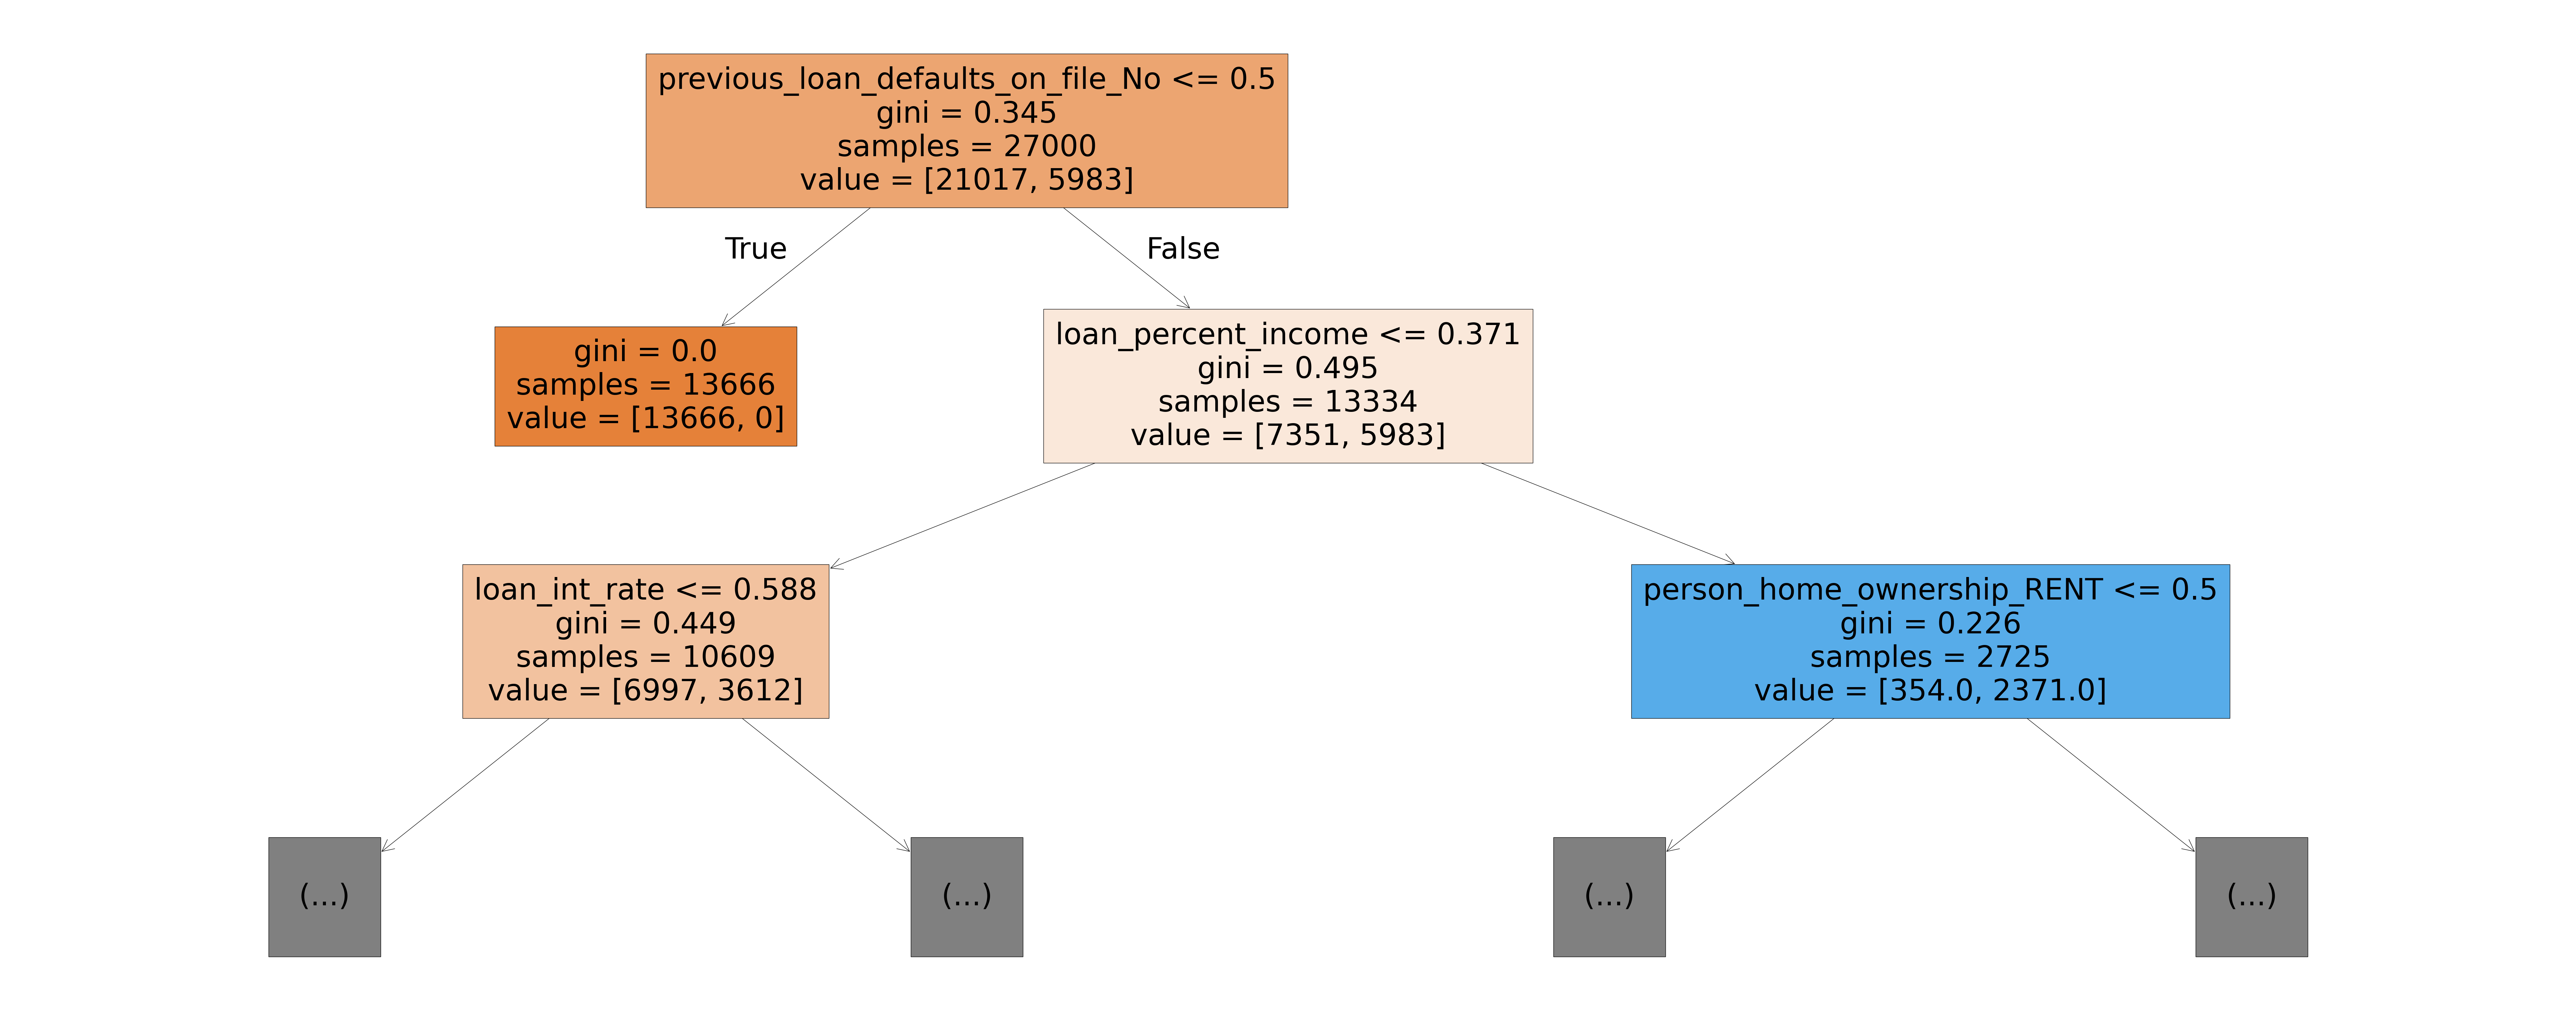

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(100,40))
plot_tree(modeldt, feature_names=train_df.columns, max_depth=2, filled=True)

In [ ]:
max_depth=modeldt.tree_.max_depth

print("Depth of the Decision Tree: ", max_depth)

Depth of the Decision Tree:  32


In [ ]:
from sklearn.tree import DecisionTreeClassifier


# To get the total number of leaf nodes
total_leaf_nodes = modeldt.get_n_leaves()
print("Total number of leaf nodes:", total_leaf_nodes)


Total number of leaf nodes: 1956


In [ ]:
tree_text = export_text(modeldt, max_depth=10, feature_names=list(train_df.columns))
print(tree_text[:5000])

|--- previous_loan_defaults_on_file_No <= 0.50
|   |--- class: 0
|--- previous_loan_defaults_on_file_No >  0.50
|   |--- loan_percent_income <= 0.37
|   |   |--- loan_int_rate <= 0.59
|   |   |   |--- person_income <= 0.00
|   |   |   |   |--- loan_percent_income <= 0.19
|   |   |   |   |   |--- loan_amnt <= 0.07
|   |   |   |   |   |   |--- loan_int_rate <= 0.56
|   |   |   |   |   |   |   |--- loan_intent_HOMEIMPROVEMENT <= 0.50
|   |   |   |   |   |   |   |   |--- person_income <= 0.00
|   |   |   |   |   |   |   |   |   |--- person_income <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- loan_percent_income <= 0.17
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- loan_percent_income >  0.17
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- person_income >  0.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- person_i

In [ ]:
modeldt.feature_importances_

array([1.80351009e-01, 5.64591686e-02, 1.90740725e-01, 1.73538270e-01,
       4.98829958e-03, 2.88077407e-04, 1.11179707e-02, 4.40124969e-02,
       1.01107747e-02, 5.62473347e-03, 8.03743656e-03, 1.02723881e-02,
       4.65350670e-03, 8.04279626e-03, 2.91762347e-01, 0.00000000e+00])

In [ ]:
importance_df=pd.DataFrame({
    'features':train_df.columns,
    'importance':modeldt.feature_importances_,
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(18)

,features,importance
14,previous_loan_defaults_on_file_No,0.291762
2,loan_int_rate,0.190741
0,person_income,0.180351
3,loan_percent_income,0.173538
1,loan_amnt,0.056459
7,person_home_ownership_RENT,0.044012
6,person_home_ownership_OWN,0.011118
11,loan_intent_MEDICAL,0.010272
8,loan_intent_DEBTCONSOLIDATION,0.010111
13,loan_intent_VENTURE,0.008043


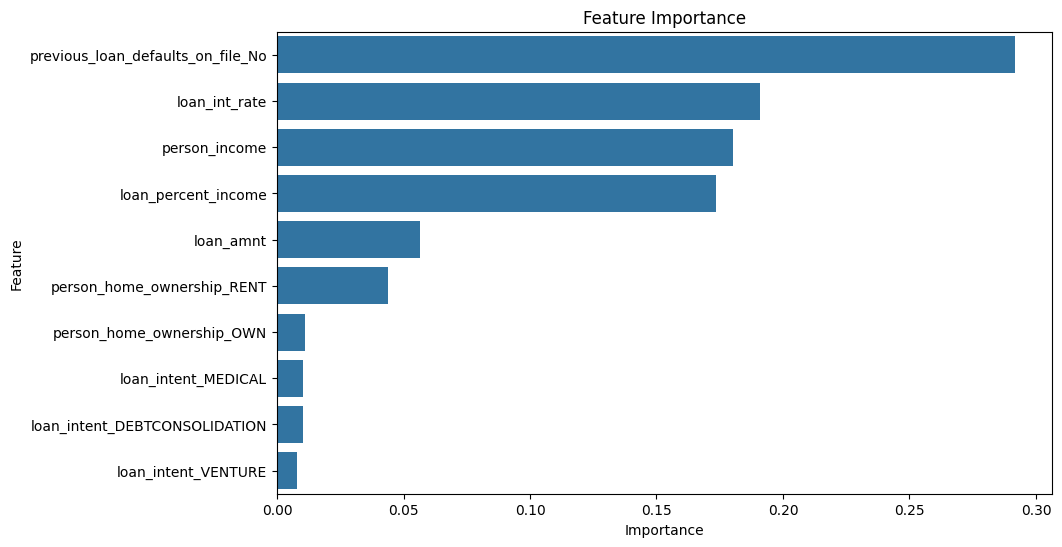

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'importance_df' with columns 'importance' and 'feature'
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
modeldtun = DecisionTreeClassifier(max_depth=10, random_state=42)
modeldtun.fit(train_df, model_target_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
modeldtun.score(train_df, model_target_train)

0.9319259259259259

In [ ]:
modeldtun.score(val_df,model_target_val)

0.921

In [ ]:
def max_depth_error(md):
    ML=DecisionTreeClassifier(max_depth=md,random_state=42)
    ML.fit(train_df,model_target_train)
    train_error=1-ML.score(train_df,model_target_train)
    val_error=1-ML.score(val_df,model_target_val)
    return{'Max_depth':md,'Train_error':train_error,'Validation_error':val_error}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 16)])

CPU times: total: 797 ms
Wall time: 795 ms


In [ ]:
errors_df

,Max_depth,Train_error,Validation_error
0,1,0.221593,0.223000
1,2,0.146889,0.149778
2,3,0.104037,0.104222
3,4,0.087778,0.089333
4,5,0.085593,0.086667
5,6,0.085000,0.087222
6,7,0.079889,0.083111
7,8,0.077370,0.082111
8,9,0.072963,0.083333
9,10,0.068074,0.079000


In [ ]:
train_errorssorted=errors_df['Train_error'].sort_values()
val_errorssorted=errors_df['Validation_error'].sort_values()


In [ ]:
print("train errors")
print(train_errorssorted)

train errors
14    0.039963
13    0.046185
12    0.052704
11    0.058407
10    0.062481
9     0.068074
8     0.072963
7     0.077370
6     0.079889
5     0.085000
4     0.085593
3     0.087778
2     0.104037
1     0.146889
0     0.221593
Name: Train_error, dtype: float64


In [ ]:
print('validation errors')
val_errorssorted

validation errors


11    0.077222
10    0.078000
9     0.079000
12    0.079444
13    0.081111
7     0.082111
6     0.083111
8     0.083333
14    0.083333
4     0.086667
5     0.087222
3     0.089333
2     0.104222
1     0.149778
0     0.223000
Name: Validation_error, dtype: float64

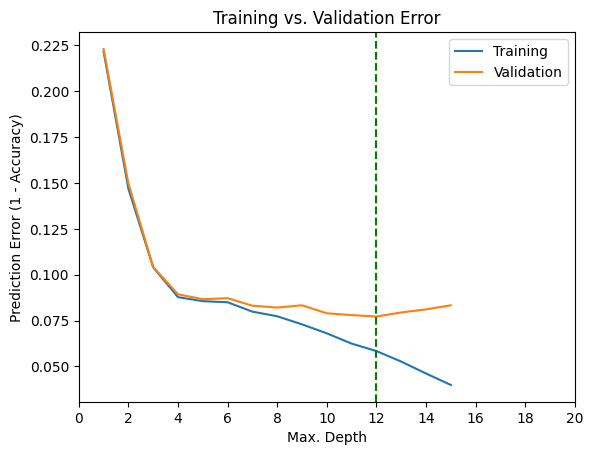

In [ ]:
plt.figure()
plt.plot(errors_df['Max_depth'], errors_df['Train_error'])
plt.plot(errors_df['Max_depth'], errors_df['Validation_error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])
plt.axvline(x=12,color='green',linestyle='dashed')

In [ ]:
modeldtun1 = DecisionTreeClassifier(max_depth=12, random_state=42)

In [ ]:
modeldtun1.fit(train_df,model_target_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [ ]:
modeldtun1.score(train_df, model_target_train)

0.9415925925925926

In [ ]:
modeldtun1.score(val_df, model_target_val)

0.9227777777777778

In [ ]:
modeldtun1.score(test_df, model_target_test)

0.918

In [ ]:
def predict_and_plot_dt(inputs, targets, name=''):
    preds = modeldtun1.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

Accuracy: 91.80%


array([0, 0, 1, ..., 0, 0, 0], shape=(9000,))

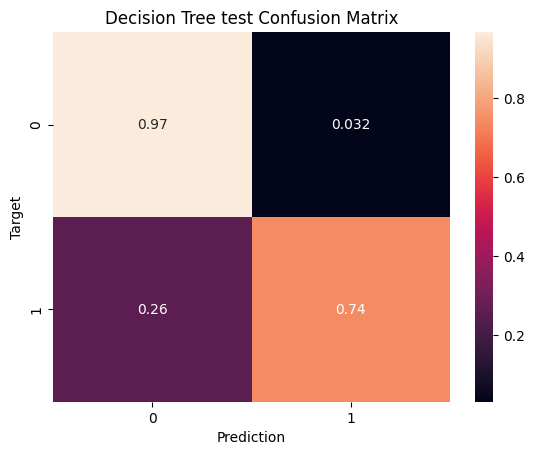

In [ ]:
predict_and_plot_dt(test_df, model_target_test, name='Decision Tree test')

In [ ]:
def predict_inputdDT(single_inputdt):
    input_df=pd.DataFrame([single_inputdt])
    input_df[single_input_numerical]=scaler.transform(input_df[single_input_numerical])
    input_df[encoded_colofinput]=encoder.transform(input_df[single_input_categorical])

    final_single_input=input_df[single_input_numerical+encoded_colofinput]
    pred=modeldtun1.predict(final_single_input)[0]
    return pred

In [ ]:
total_leaf_nodestun1 = modeldtun1.get_n_leaves()
print("Total number of leaf nodes:", total_leaf_nodes)

total_leaf_nodestun1

# def max_depth_error(md):
#     ML=DecisionTreeClassifier(max_depth=md,random_state=42)
#     ML.fit(train_df,model_target_train)
#     train_error=1-ML.score(train_df,model_target_train)
#     val_error=1-ML.score(val_df,model_target_val)
#     return{'Max_depth':md,'Train_error':train_error,'Validation_error':val_error}

Total number of leaf nodes: 1956


np.int64(370)

In [ ]:
def max_leaf_nodes(lfn):
    ML=DecisionTreeClassifier(max_leaf_nodes=lfn, random_state=42)
    ML.fit(train_df,model_target_train)
    train_error=1-ML.score(train_df,model_target_train)
    val_error=1-ML.score(val_df,model_target_val)
    return{'Max_leaf_nodes':lfn,'Train_error':train_error,'Validation_error':val_error}

errors_dftun1 = pd.DataFrame([max_leaf_nodes(lfn) for lfn in range(100, 150,1)])


In [ ]:
errors_dftun1

,Max_leaf_nodes,Train_error,Validation_error
0,100,0.065481,0.076000
1,101,0.065259,0.075778
2,102,0.065259,0.075778
3,103,0.065148,0.075778
4,104,0.065148,0.075778
5,105,0.065148,0.075778
6,106,0.065148,0.075778
7,107,0.065074,0.076111
8,108,0.064963,0.075667
9,109,0.064963,0.075667


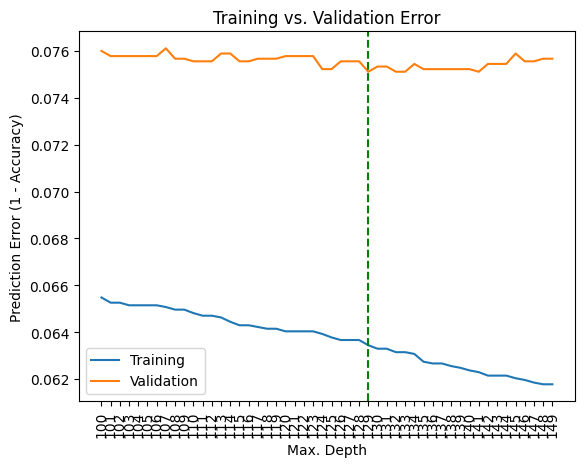

In [ ]:
plt.figure()
plt.plot(errors_dftun1['Max_leaf_nodes'], errors_dftun1['Train_error'])
plt.plot(errors_dftun1['Max_leaf_nodes'], errors_dftun1['Validation_error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(100,150, 1))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

plt.xticks(rotation=90)
plt.axvline(x=129,linestyle='dashed',color='green')

In [ ]:
modeltun2= DecisionTreeClassifier(max_leaf_nodes=129,max_depth=12, random_state=42)

In [ ]:
modeltun2.fit(train_df,model_target_train)

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=129, random_state=42)

In [ ]:

modeltun2.score(train_df, model_target_train)

0.9344444444444444

In [ ]:
modeltun2.score(val_df,model_target_val)

0.9241111111111111

In [ ]:
modeltun2.score(test_df,model_target_test)

0.9226666666666666

In [ ]:
data_dict1 = {
    "person_age": 22.0,
    "person_gender": "female",
    "person_education": "Master",
    "person_income": 71948.0,
    "person_emp_exp": 0,
    "person_home_ownership": "RENT",
    "loan_amnt":40000.0,
    "loan_intent": "PERSONAL",
    "loan_int_rate": 16.02,
    "loan_percent_income": 0.49,
    "cb_person_cred_hist_length": 3.0,
    "credit_score": 561,
    "previous_loan_defaults_on_file": "No"
}



ansdt=predict_inputdDT(data_dict1)

if ansdt==0:
    print("The loan will not be paid back")
elif ansdt==1:
    print("The loan will be paid back")

The loan will be paid back


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)
model_rf.fit(train_df, model_target_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model_rf.score(train_df, model_target_train)

1.0

In [ ]:
model_rf.score(val_df, model_target_val)

0.9256666666666666

In [ ]:
model_rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

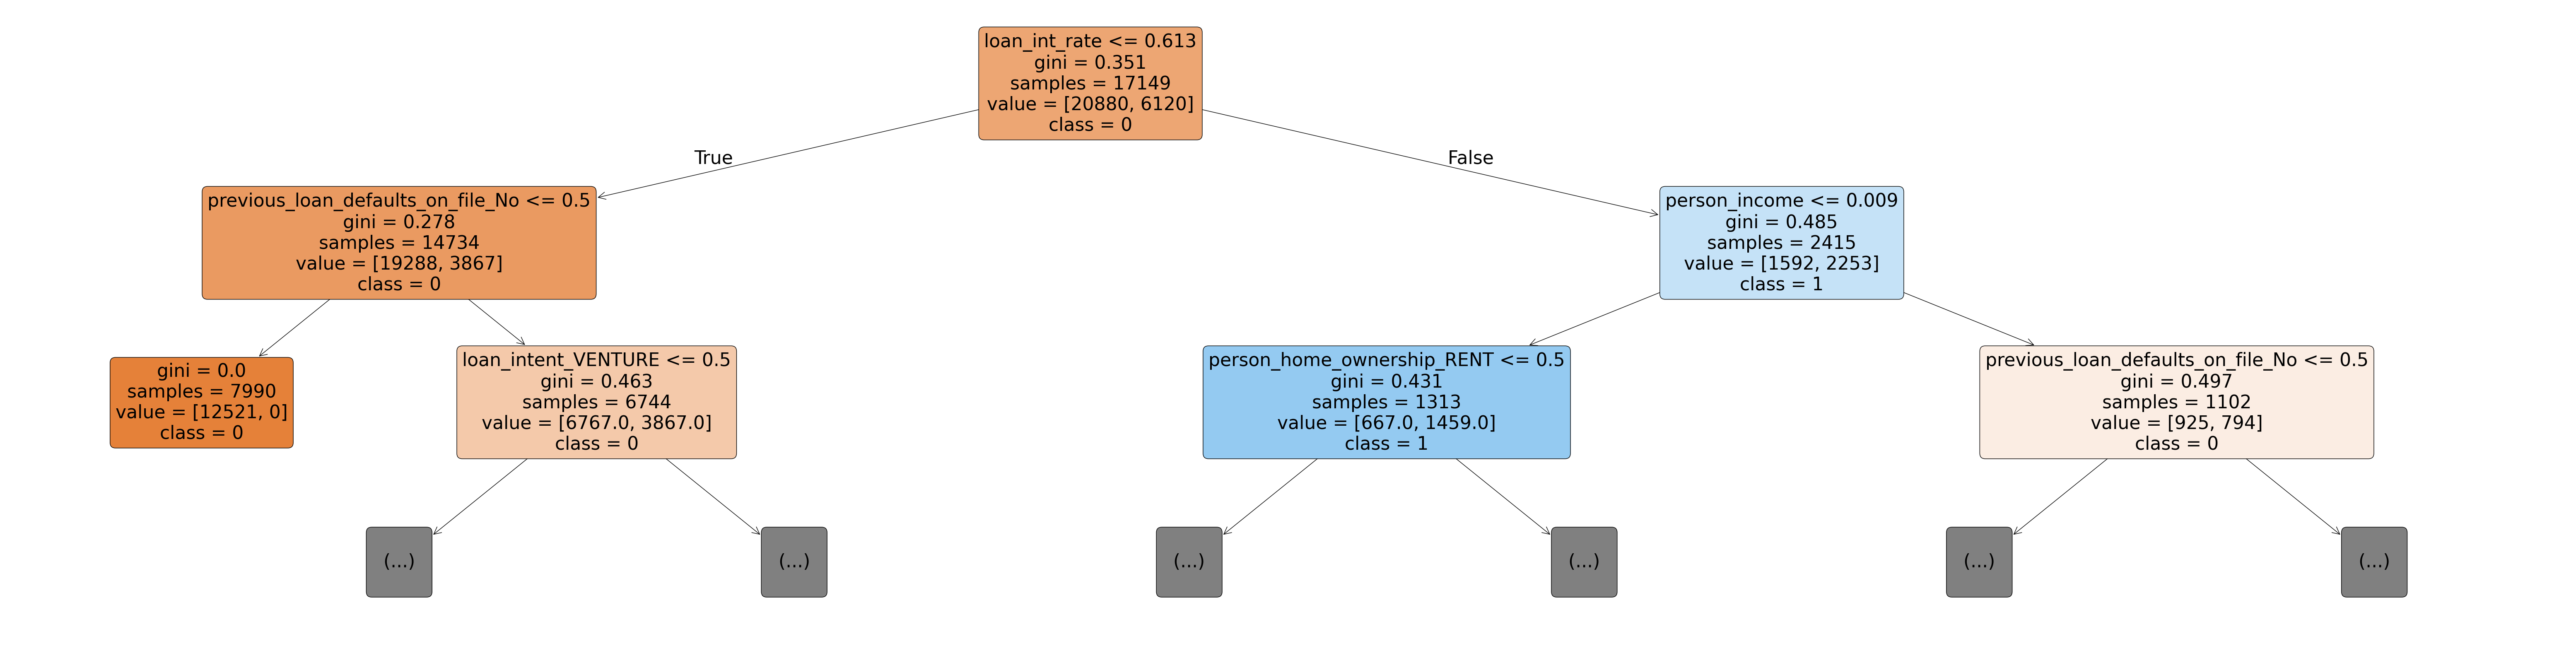

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 20))
plot_tree(model_rf.estimators_[0], max_depth=2, feature_names=train_df.columns,
          filled=True, rounded=True, class_names=[str(cls) for cls in model_rf.classes_])
plt.show()


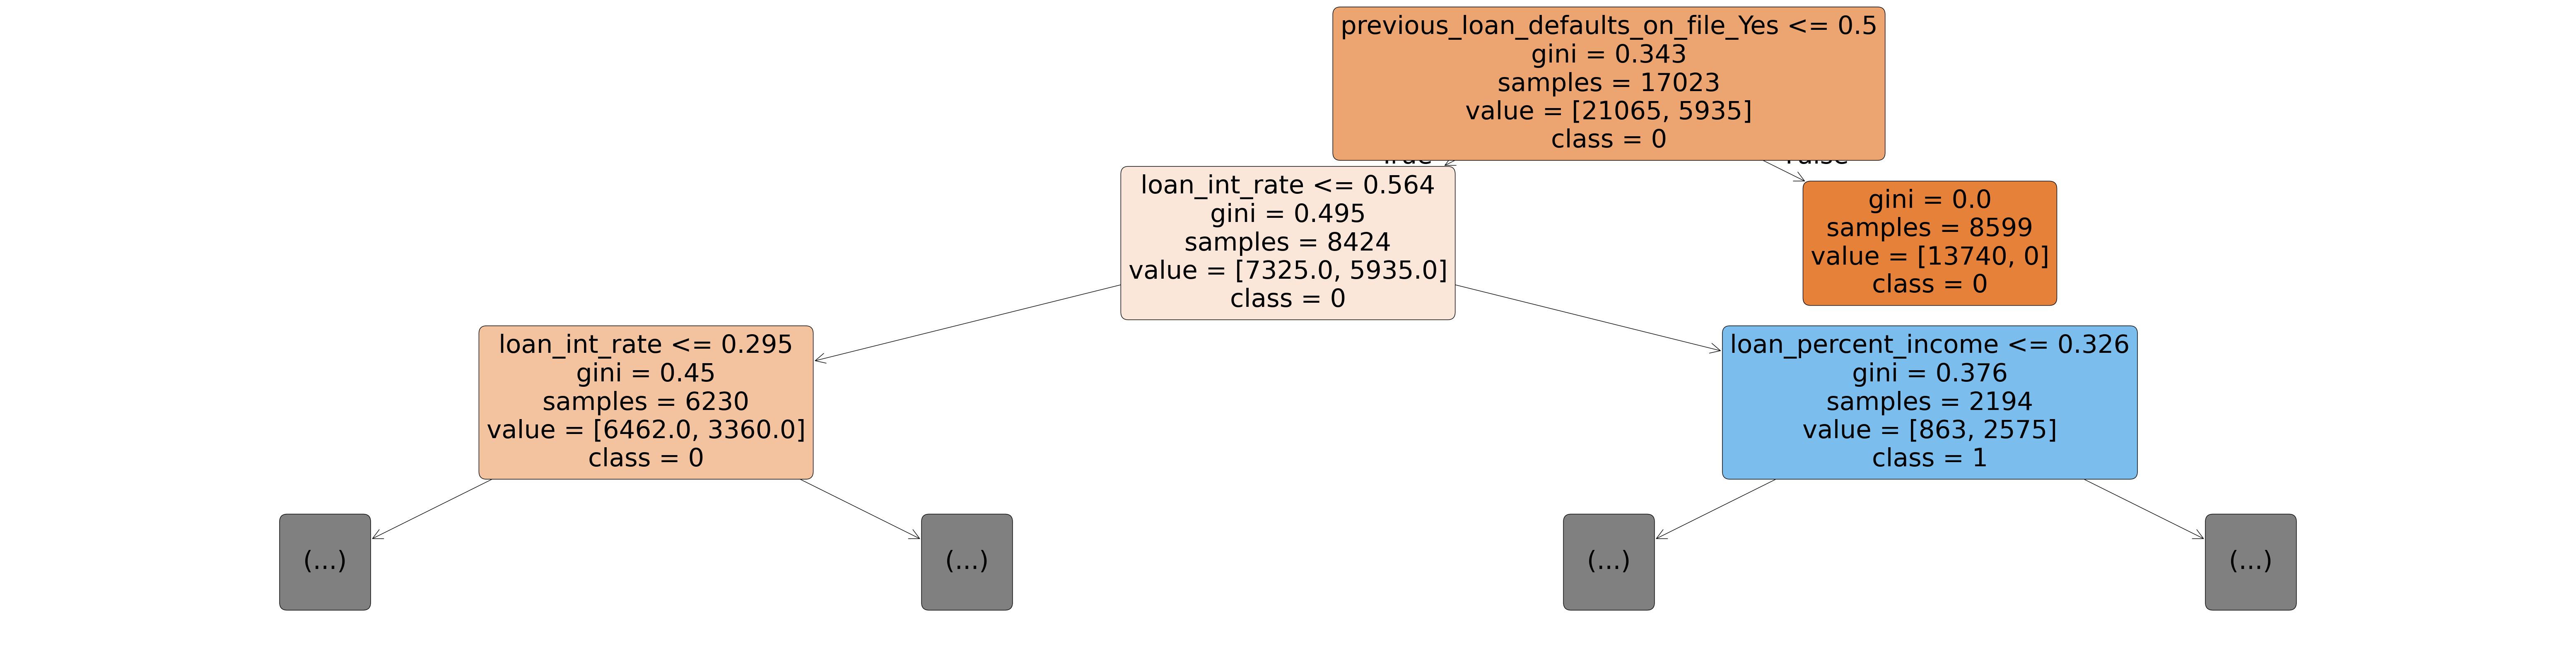

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 20))
plot_tree(model_rf.estimators_[15], max_depth=2, feature_names=train_df.columns,
          filled=True, rounded=True, class_names=[str(cls) for cls in model_rf.classes_])
plt.show()

In [ ]:
len(model_rf.estimators_)

100

In [ ]:
importancerf_df = pd.DataFrame({
    'feature': train_df.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importancerf_df.head(10)

,feature,importance
2,loan_int_rate,0.193355
3,loan_percent_income,0.177947
0,person_income,0.170629
14,previous_loan_defaults_on_file_No,0.131523
15,previous_loan_defaults_on_file_Yes,0.124934
1,loan_amnt,0.088022
7,person_home_ownership_RENT,0.037919
4,person_home_ownership_MORTGAGE,0.018469
6,person_home_ownership_OWN,0.010425
10,loan_intent_HOMEIMPROVEMENT,0.009175


In [ ]:
def estimators(est):
    ML=RandomForestClassifier(n_estimators=est,random_state=42)
    ML.fit(train_df,model_target_train)
    train_error=1-ML.score(train_df,model_target_train)
    val_error=1-ML.score(val_df,model_target_val)
    return{'No_estimators':est,'Train_error':train_error,'Validation_error':val_error}

In [ ]:
%%time
errors_df = pd.DataFrame([estimators(est) for est in range(10, 100)])

CPU times: total: 2min 9s
Wall time: 2min 21s


In [ ]:
idx=np.where(errors_df['Validation_error']==min(errors_df['Validation_error']))
errors_df.iloc[idx]

,No_estimators,Train_error,Validation_error
36,46,0.000259,0.073889


In [ ]:
min_val_error=errors_df['Validation_error'].min()
min_val_error

np.float64(0.07388888888888889)

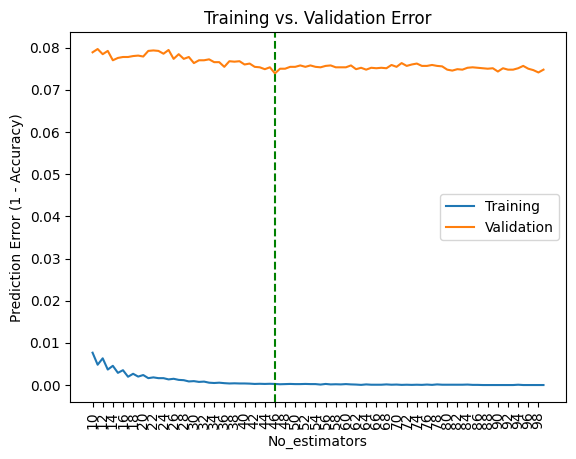

In [ ]:
plt.figure()
plt.plot(errors_df['No_estimators'], errors_df['Train_error'])
plt.plot(errors_df['No_estimators'], errors_df['Validation_error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(10,100, 2))
plt.xlabel('No_estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

plt.xticks(rotation=90)
plt.axvline(x=46,color='green',linestyle='dashed')


In [ ]:
print("we are getting validation erroe less  when no. of estimators is 46")

we are getting validation erroe less  when no. of estimators is 46


In [ ]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(train_df, model_target_train)

In [ ]:
base_train_acc = base_model.score(train_df, model_target_train)
base_val_acc = base_model.score(val_df, model_target_val)

print("Base Model Train Accuracy:", base_train_acc)
print("Base Model Validation Accuracy:", base_val_acc)

Base Model Train Accuracy: 1.0
Base Model Validation Accuracy: 0.9256666666666666


In [ ]:
print("The number of max features in the base model is:", len(base_model.feature_importances_))
print("The total number of features in the base model is:", len(train_df.columns))
print("the max depth of tree in the base model is:", base_model.max_depth)
print("the no. of leaf nodes in the base model is:", base_model.max_leaf_nodes)
print("the min_sample split in the base model is:", base_model.min_samples_split)
print("the min_sample leaf in the base model is:", base_model.min_samples_leaf)


The number of max features in the base model is: 16
The total number of features in the base model is: 16
the max depth of tree in the base model is: None
the no. of leaf nodes in the base model is: None
the min_sample split in the base model is: 2
the min_sample leaf in the base model is: 1


In [ ]:
def maxfeatures(maxxfeature):
    ML=RandomForestClassifier(n_estimators=46,max_features=maxxfeature,random_state=42)
    ML.fit(train_df,model_target_train)
    train_error=1-ML.score(train_df,model_target_train)
    val_error=1-ML.score(val_df,model_target_val)
    return{'Max_features':maxxfeature,'Train_error':train_error,'Validation_error':val_error}

In [ ]:
%%time
errors_maxfeaturesdf = pd.DataFrame([maxfeatures(maxxfeature) for maxxfeature in range(1, 17,1)])

CPU times: total: 15 s
Wall time: 15.4 s


In [ ]:
min_val_error=errors_maxfeaturesdf['Validation_error'].min()
min_val_error

np.float64(0.07144444444444442)

In [ ]:
idx_min_val_error=np.where(errors_maxfeaturesdf['Validation_error']==min(errors_maxfeaturesdf['Validation_error']))
errors_maxfeaturesdf.iloc[idx_min_val_error]

,Max_features,Train_error,Validation_error
14,15,0.000333,0.071444


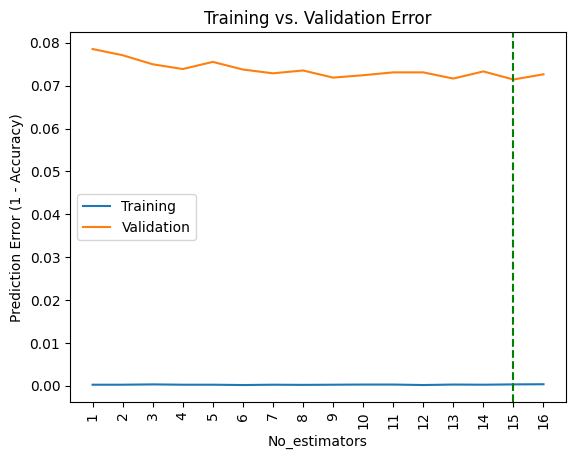

In [ ]:
plt.figure()
plt.plot(errors_maxfeaturesdf['Max_features'], errors_maxfeaturesdf['Train_error'])
plt.plot(errors_maxfeaturesdf['Max_features'], errors_maxfeaturesdf['Validation_error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(1,17, 1))
plt.xlabel('No_estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

plt.xticks(rotation=90)
plt.axvline(x=15,color='green',linestyle='dashed')

In [ ]:
print("the no. of max features is 15")

the no. of max features is 15


In [ ]:
def test_params(**params):
    # **params collects all additional keyword arguments into a dictionary
    model_rf = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_df, model_target_train)
    # **params unpacks the dictionary and passes the keyword arguments to the RandomForestClassifier
    return model_rf.score(train_df, model_target_train), model_rf.score(val_df, model_target_val)


In [ ]:
test_params(n_estimators=46, max_features=15, max_depth=13)

model_score_max_depth=[test_params(n_estimators=46, max_features=15, max_depth=md) for md in range(1, 21,1)]

In [ ]:
def max_depth_error(md):
    ML=RandomForestClassifier(n_estimators=46,max_features=15,max_depth=md,random_state=42)
    ML.fit(train_df,model_target_train)
    train_error=1-ML.score(train_df,model_target_train)
    val_error=1-ML.score(val_df,model_target_val)
    return{'Max_depth':md,'Train_error':train_error,'Validation_error':val_error}

In [ ]:
errors_df_maxdepth=pd.DataFrame([max_depth_error(md) for md in range(1, 21,1)])
errors_df_maxdepth

,Max_depth,Train_error,Validation_error
0,1,0.221593,0.223000
1,2,0.146889,0.149778
2,3,0.103963,0.104222
3,4,0.086296,0.087556
4,5,0.085185,0.086222
5,6,0.083222,0.085333
6,7,0.076926,0.079889
7,8,0.072444,0.078556
8,9,0.068333,0.075111
9,10,0.063185,0.073444


In [ ]:
max_deptherroridx=np.where(errors_df_maxdepth['Validation_error']==min(errors_df_maxdepth['Validation_error']))
errors_df_maxdepth.iloc[max_deptherroridx]


,Max_depth,Train_error,Validation_error
14,15,0.031741,0.071667


In [ ]:
print("the no. of max depth is 14")

the no. of max depth is 14


In [ ]:
test_params(n_estimators=46, max_features=15, max_depth=14)

(0.9624444444444444, 0.9264444444444444)

In [ ]:
test_params(n_estimators=46, max_features=15, max_depth=14,min_samples_leaf=2)

(0.9587037037037037, 0.9283333333333333)

In [ ]:
model_score_min_samples_leaf=[test_params(n_estimators=46, max_features=15, max_depth=14,min_samples_leaf=msl) for msl in range(1, 10,1)]
model_score_min_samples_leaf

[(0.9624444444444444, 0.9264444444444444),
 (0.9587037037037037, 0.9283333333333333),
 (0.9554074074074074, 0.9274444444444444),
 (0.9522592592592592, 0.928),
 (0.9494814814814815, 0.9268888888888889),
 (0.948037037037037, 0.9278888888888889),
 (0.9463333333333334, 0.9263333333333333),
 (0.9443333333333334, 0.9278888888888889),
 (0.9435925925925925, 0.927)]

In [ ]:
print("the no. of min_samples_leaf is 2")

the no. of min_samples_leaf is 2


In [ ]:
test_params(n_estimators=46, max_features=15, max_depth=14,min_samples_leaf=2,min_samples_split=4)

(0.9587037037037037, 0.9283333333333333)

In [ ]:
model_score_min_split=[test_params(n_estimators=46, max_features=15, max_depth=14,min_samples_leaf=2,min_samples_split=ms) for ms in range(2, 6,1)]

In [ ]:
model_score_min_split

[(0.9587037037037037, 0.9283333333333333),
 (0.9587037037037037, 0.9283333333333333),
 (0.9587037037037037, 0.9283333333333333),
 (0.9573703703703703, 0.9278888888888889)]

In [ ]:
errors_df_impurity_split=[test_params(min_impurity_decrease=1e-7,n_estimators=46, max_features=15, max_depth=14,min_samples_leaf=2,min_samples_split=2) ]

In [ ]:
errors_df_impurity_split

[(0.9587037037037037, 0.9283333333333333)]

In [ ]:
class_weight_accuracy=pd.DataFrame([test_params(min_impurity_decrease=1e-7,n_estimators=46, max_features=15, max_depth=14,min_samples_leaf=2,min_samples_split=2,class_weight = {0: 0.222, 1: cw})for cw in np.arange(0.3,0.8,0.05)])

In [ ]:
class_weight_accuracy

,0,1
0,0.961481,0.926111
1,0.962815,0.927333
2,0.961741,0.924556
3,0.962333,0.922222
4,0.961852,0.921667
5,0.962037,0.921111
6,0.961667,0.921222
7,0.961222,0.919556
8,0.960926,0.919111
9,0.960148,0.916778


In [ ]:
final_model_rf=RandomForestClassifier(min_impurity_decrease=1e-7,n_estimators=46, max_features=15, max_depth=14,min_samples_leaf=2,min_samples_split=2,class_weight = {0: 0.222, 1: 0.35})

In [ ]:
final_model_rf.fit(train_df,model_target_train)

RandomForestClassifier(class_weight={0: 0.222, 1: 0.35}, max_depth=14,
                       max_features=15, min_impurity_decrease=1e-07,
                       min_samples_leaf=2, n_estimators=46)

In [ ]:
final_model_rf.score(test_df,model_target_test)

0.926

In [ ]:
def predict_and_plot_rf(inputs, targets, name=''):
    preds = final_model_rf.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

Accuracy: 92.60%


array([0, 0, 1, ..., 0, 1, 0], shape=(9000,))

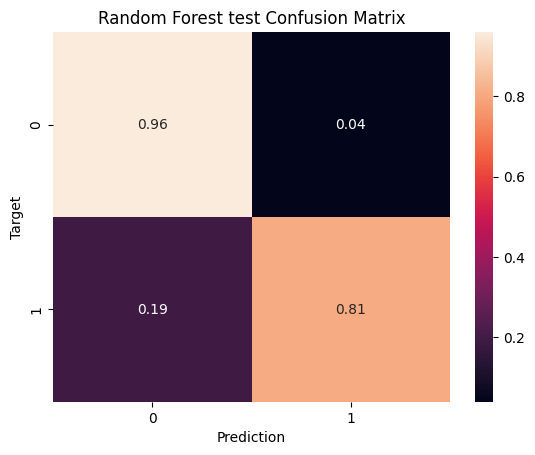

In [ ]:
predict_and_plot_rf(test_df, model_target_test, name='Random Forest test')

In [ ]:
print("the test acccuracy of logistic regression",0.8893333333333333*100)

print("the test accuracy of decision tree",0.9226666666666666*100)

print("the test accuracy of random forest",0.9261111111111111*100)

the test acccuracy of logistic regression 88.93333333333334
the test accuracy of decision tree 92.26666666666667
the test accuracy of random forest 92.61111111111111


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(train_df, model_target_train)

gb_clf.score(train_df, model_target_train)

print("the traning accuracy ",gb_clf.score(train_df, model_target_train))
print("validation accuracy",gb_clf.score(val_df, model_target_val))




the traning accuracy  0.925
validation accuracy 0.923


In [ ]:
param_grid = {
    'n_estimators': [  200,300],
    'learning_rate': [ 0.01, 0.1 ],
    'max_depth': [3, 4],

}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def test_params_gd(**params):

    model_gd = GradientBoostingClassifier(random_state=42, **params).fit(train_df, model_target_train)

    train_score = model_gd.score(train_df, model_target_train)
    val_score = model_gd.score(val_df, model_target_val)

    return train_score, val_score


In [ ]:
test_params_gd(n_estimators=200, learning_rate=1, max_depth=4 )

(0.9746296296296296, 0.9283333333333333)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')  # cv: cross-validation folds
grid_search.fit(train_df, model_target_train)

best_gb_clf = grid_search.best_estimator_

In [ ]:
best_gb_clf

GradientBoostingClassifier(max_depth=4, n_estimators=300, random_state=42)

In [ ]:
best_gb_clf.score(train_df, model_target_train)

0.9480740740740741

In [ ]:
best_gb_clf.score(val_df, model_target_val)

0.9305555555555556

Accuracy: 93.06%


array([0, 0, 0, ..., 0, 0, 1], shape=(9000,))

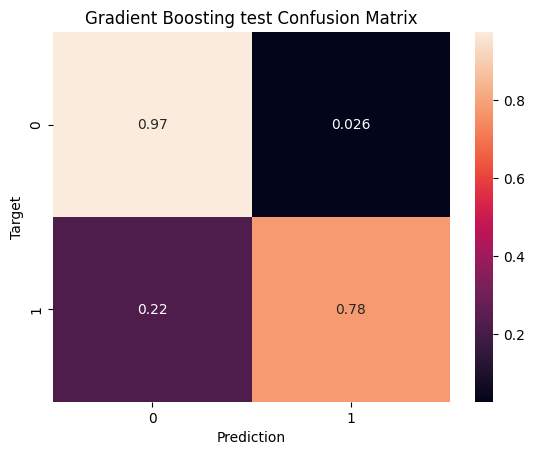

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = best_gb_clf.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds



predict_and_plot(val_df, model_target_val, name='Gradient Boosting test')

In [ ]:
test_params_gd(n_estimators=400, learning_rate=0.1, max_depth=5 )

(0.9665555555555555, 0.9328888888888889)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model_gd_final = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=5, random_state=42)
model_gd_final.fit(test_df, model_target_test)
model_gd_final.score(test_df, model_target_test)


def predict_and_plot(inputs, targets, name=''):
    preds = model_gd_final.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds


Accuracy: 98.98%


array([0, 0, 1, ..., 0, 0, 0], shape=(9000,))

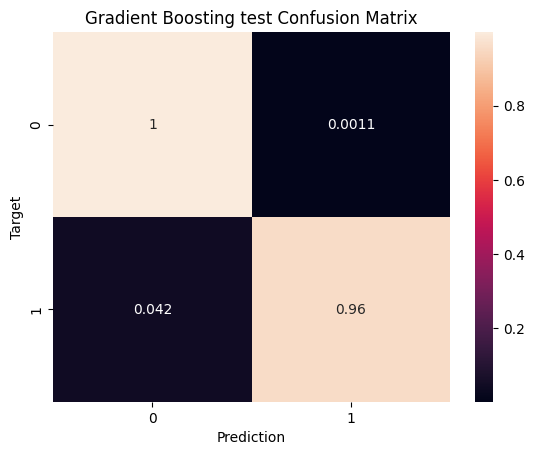

In [ ]:
predict_and_plot(test_df, model_target_test, name='Gradient Boosting test')

In [ ]:


print("the test accuracy of decision tree",0.9226666666666666*100)

print("the test accuracy of random forest",0.9261111111111111*100)

print("the test accuracy of gradient boosting",0.9898*100)

the test accuracy of decision tree 92.26666666666667
the test accuracy of random forest 92.61111111111111
the test accuracy of gradient boosting 98.98


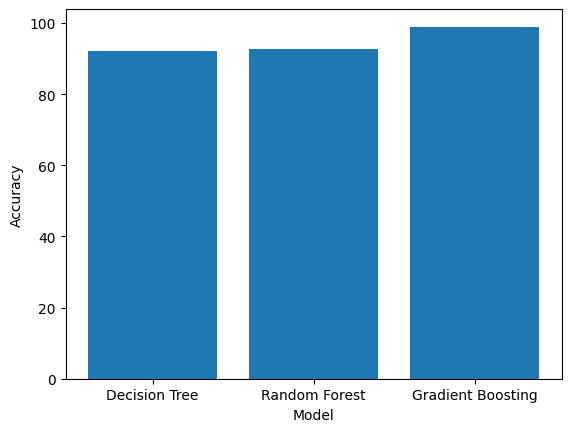

In [ ]:
import matplotlib.pyplot as plt

list_y=[92.266,92.611,98.98]
list_x=['Decision Tree','Random Forest','Gradient Boosting']
plt.bar(list_x,list_y)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
def predict_input_gd(single_inputdt):
    input_df=pd.DataFrame([single_inputdt])
    input_df[single_input_numerical]=scaler.transform(input_df[single_input_numerical])
    input_df[encoded_colofinput]=encoder.transform(input_df[single_input_categorical])
    final_single_input=input_df[single_input_numerical+encoded_colofinput]
    pred=model_gd_final.predict(final_single_input)[0]
    return pred


data_dict_data = {
  "person_age": 30.0,
    "person_gender": "MALE",
    "person_education": "BACHELOR",
    "person_income": 61000.0,
    "person_emp_exp": 5,
    "person_home_ownership": "OWN",
    "loan_amnt":0.0,
    "loan_intent": "EDUCATION",
    "loan_int_rate": 10.5,
    "loan_percent_income": 0.50,
    "cb_person_cred_hist_length": 3.0,
    "credit_score": 700,
    "previous_loan_defaults_on_file": "No"
}



ans=predict_input_gd(data_dict_data)

if ans==0:
    print("The loan will not be paid back")
elif ans==1:
    print("The loan will be paid back")

The loan will not be paid back
